In [17]:
import pandas as pd
df= pd.read_csv("house_prices.csv")
df[["Carpet Area", "Amount(in rupees)"]]

,Carpet Area,Amount(in rupees)
0,500 sqft,42 Lac
1,473 sqft,98 Lac
2,779 sqft,1.40 Cr
3,530 sqft,25 Lac
4,635 sqft,1.60 Cr
...,...,...
187526,NaN,63 Lac
187527,NaN,55 Lac
187528,1250 sqft,76 Lac
187529,NaN,30 Lac


In [18]:
df.dtypes

Index                  int64
Title                 object
Description           object
Amount(in rupees)     object
Price (in rupees)    float64
location              object
Carpet Area           object
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
overlooking           object
Society               object
Bathroom              object
Balcony               object
Car Parking           object
Ownership             object
Super Area            object
Dimensions           float64
Plot Area            float64
dtype: object

In [19]:
df['Carpet Area'] = df['Carpet Area'].str.replace(' sqft', '', regex=False)
df['Amount(in rupees)'] = df['Amount(in rupees)'].str.replace(' Lac', '00000', regex=False)
df['Amount(in rupees)'] = df['Amount(in rupees)'].str.replace(' Cr', '00000', regex=False)
df['Amount(in rupees)'] = df['Amount(in rupees)'].str.replace('.', '', regex=False)
df['Amount(in rupees)'] = df['Amount(in rupees)'].str.replace(',', '', regex=False)



In [20]:
df[["Carpet Area", "Amount(in rupees)"]]

,Carpet Area,Amount(in rupees)
0,500,4200000
1,473,9800000
2,779,14000000
3,530,2500000
4,635,16000000
...,...,...
187526,NaN,6300000
187527,NaN,5500000
187528,1250,7600000
187529,NaN,3000000


In [25]:
df['Amount(in rupees)'] = pd.to_numeric(df['Amount(in rupees)'], errors='coerce')
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')

In [23]:
df.dtypes

Index                  int64
Title                 object
Description           object
Amount(in rupees)    float64
Price (in rupees)    float64
location              object
Carpet Area           object
Status                object
Floor                 object
Transaction           object
Furnishing            object
facing                object
overlooking           object
Society               object
Bathroom              object
Balcony               object
Car Parking           object
Ownership             object
Super Area            object
Dimensions           float64
Plot Area            float64
dtype: object

In [26]:
df = df.dropna(subset=['Amount(in rupees)'])
df = df.dropna(subset=['Carpet Area'])

In [27]:
df[["Carpet Area", "Amount(in rupees)"]]

,Carpet Area,Amount(in rupees)
0,500.0,4200000.0
1,473.0,9800000.0
2,779.0,14000000.0
3,530.0,2500000.0
4,635.0,16000000.0
...,...,...
187522,1200.0,8000000.0
187523,1705.0,11900000.0
187524,895.0,69600000.0
187525,1050.0,44900000.0


In [29]:
df.isnull().sum()

Index                    0
Title                    0
Description            319
Amount(in rupees)        0
Price (in rupees)     7638
location                 0
Carpet Area              0
Status                  73
Floor                 2170
Transaction             64
Furnishing              26
facing               18776
overlooking          26154
Society              48017
Bathroom                20
Balcony               6755
Car Parking          38573
Ownership            17796
Super Area           95986
Dimensions           95986
Plot Area            95986
dtype: int64

In [34]:
print(df[['Carpet Area', 'Amount(in rupees)']].describe())

         Carpet Area  Amount(in rupees)
count   95986.000000       9.598600e+04
mean     1288.851853       1.650474e+07
std      3196.537026       5.333323e+07
min         1.000000       1.000000e+05
25%       850.000000       5.000000e+06
50%      1100.000000       9.000000e+06
75%      1537.000000       2.100000e+07
max    709222.000000       1.400300e+10


In [35]:
df = df[(df['Carpet Area'] > 200) & (df['Carpet Area'] < 3000)]
df = df[(df['Amount(in rupees)'] > 10_00_000) & (df['Amount(in rupees)'] < 5_00_00_000)]

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df[["Carpet Area"]]
y = df["Amount(in rupees)"]
model.fit(X, y)

# Predict price for 500 sqft
prediction = model.predict([[500]])
print(f"Predicted price for 500 sqft: ₹{prediction[0]:,.2f}")


Predicted price for 500 sqft: ₹4,452,848.33


c:\Users\Prince\OneDrive\Desktop\OJT\OJT-AI\ojt\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\Prince\OneDrive\Desktop\OJT\OJT-AI\ojt\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


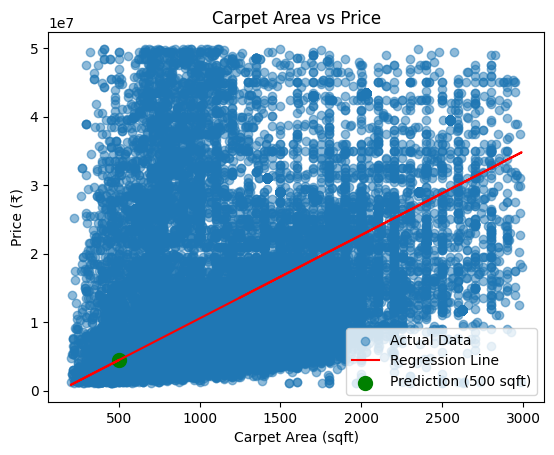

In [37]:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter([500], model.predict([[500]]), color='green', label='Prediction (500 sqft)', s=100)
plt.xlabel('Carpet Area (sqft)')
plt.ylabel('Price (₹)')
plt.title('Carpet Area vs Price')
plt.legend()
plt.show()
